#       Analysis on Crime Data in Bethesda and Nearby Cities


        Qingyang Song

## Introduction

The main goal of this project is to analyze crime data for Bethesda and nearby cities and get
some overall trends. It could potentially help people locate the most dangerous place in Bethesda and help the police.

In this project, we will be analyzing the trend and the relationship between the types of crimes and the time range of crimes. As well as the types of crimes and the location of crimes. Lastly, try to predict the types of crimes under certain condition.

## Required Tools

I'm using Python 3 for this project.
The required packages are:
pandas, numpy, sklearn, statsmodels, matplotlib, datetime, folium

In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import datasets as ds
from sklearn import linear_model as lm
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
import folium
from folium import plugins
import warnings
warnings.filterwarnings('ignore')

## Data Collection

The dataset is found at dataMontgomery(https://data.montgomerycountymd.gov/). The data presented is derived from reported crimes classified according to the National Incident-Based Reporting System (NIBRS) of the Criminal Justice Information Services (CJIS) Division Uniform Crime Reporting (UCR) Program and documented by approved police incident reports. The data is compiled by “EJustice”, a respected law enforcement records-management system used by the Montgomery County Police Department and many other law enforcement agencies. To protect victims’ privacy, no names or other personal information are released. The information contained herein includes all founded crimes reported after July 1st 2016 and entered to-date utilizing Uniform Crime Reporting (UCR) rules.

I start by downloading the CSV file of the data and use pandas to read it and convert it into a dataframe. "head" command displays the first five rows of the data frame.

In [2]:
crime = pd.read_csv("Crime.csv")
crime.head()

,Incident ID,Offence Code,CR Number,Dispatch Date / Time,NIBRS Code,Victims,Crime Name1,Crime Name2,Crime Name3,Police District Name,...,Street Prefix,Street Name,Street Suffix,Street Type,Start_Date_Time,End_Date_Time,Latitude,Longitude,Police District Number,Location
0,201087097,5707,16033232,NaN,90J,1,Crime Against Society,Trespass of Real Property,TRESPASSING,WHEATON,...,NaN,CONNECTICUT,NaN,AVE,07/01/2016 12:04:00 AM,NaN,39.078911,-77.080827,4D,"(39.0789, -77.0808)"
1,201215730,5311,180058531,11/22/2018 04:58:01 AM,90C,1,Crime Against Society,Disorderly Conduct,PUBLIC PEACE - DISORDERLY CONDUCT,CITY OF TAKOMA PARK,...,NaN,NEW HAMPSHIRE,NaN,AVE,11/22/2018 04:58:00 AM,11/22/2018 10:00:00 AM,38.973022,-76.996799,8D,"(38.973, -76.9968)"
2,201229073,3562,190009928,03/03/2019 04:59:49 AM,35A,1,Crime Against Society,Drug/Narcotic Violations,DRUGS - MARIJUANA - POSSESS,BETHESDA,...,NaN,OVERLEA,NaN,RD,03/03/2019 04:52:00 AM,03/03/2019 04:57:00 AM,38.956840,-77.111362,2D,"(38.9568, -77.1114)"
3,201233523,1114,190015440,04/03/2019 11:53:15 AM,11B,1,Crime Against Person,Forcible Sodomy,SEX ASSAULT - SODOMY-GIRL-STRONG-ARM,SILVER SPRING,...,NaN,UNIVERSITY,E,BLV,04/02/2019 11:00:00 AM,04/02/2019 12:00:00 PM,39.020392,-77.012776,3D,"(39.0204, -77.0128)"
4,201087102,3562,16033238,NaN,35A,1,Crime Against Society,Drug/Narcotic Violations,DRUGS - MARIJUANA - POSSESS,SILVER SPRING,...,NaN,SILVER SPRING,NaN,AVE,07/01/2016 12:58:00 AM,07/01/2016 12:58:00 AM,38.991701,-77.024096,3D,"(38.9917, -77.0241)"


In the dataset, we have a lot more columns and rows than we need. Many of them are either not wanted or have duplicate information with the existing ones. We will filter out the columns that we don't need and delete rows that don't belong to Bethesda crimes.

In [3]:
crime = crime.drop(columns = ['Dispatch Date / Time', 'NIBRS Code', 'Victims', 'Crime Name3', \
                            'Police District Name', 'Street Prefix', 'Street Name', \
                              'Street Suffix', 'Street Type', 'Location', 'Block Address', 'State', \
                              'Zip Code', 'Agency', 'Place', 'Sector', 'Beat', 'PRA', 'Address Number', 'End_Date_Time', 'Police District Name'])
crime.head()

,Incident ID,Offence Code,CR Number,Crime Name1,Crime Name2,City,Start_Date_Time,Latitude,Longitude,Police District Number
0,201087097,5707,16033232,Crime Against Society,Trespass of Real Property,ROCKVILLE,07/01/2016 12:04:00 AM,39.078911,-77.080827,4D
1,201215730,5311,180058531,Crime Against Society,Disorderly Conduct,NaN,11/22/2018 04:58:00 AM,38.973022,-76.996799,8D
2,201229073,3562,190009928,Crime Against Society,Drug/Narcotic Violations,BETHESDA,03/03/2019 04:52:00 AM,38.956840,-77.111362,2D
3,201233523,1114,190015440,Crime Against Person,Forcible Sodomy,SILVER SPRING,04/02/2019 11:00:00 AM,39.020392,-77.012776,3D
4,201087102,3562,16033238,Crime Against Society,Drug/Narcotic Violations,SILVER SPRING,07/01/2016 12:58:00 AM,38.991701,-77.024096,3D


Now we have our data set with the following columns:
Incident ID, Offence Code, CR Number, Crime Name1, Crime Name2, City, Start_Date_time, Latitude, Longitude, Police District Number.

## Data Visualization

In this part, we will be doing some data visualization and some basics of data analysis of the dataset to have a better overview of the dataset that we are working on. We will be obeserving some basic trends of the dateset.

First we need to make the Start_Date_Time column into datetime so we can extract important information from it. We do this by the strptime() function in the datetime package.

In [4]:
for index, row in crime.iterrows():
    if pd.isnull(row['Start_Date_Time']) == False:
        start_date_time = datetime.strptime(row['Start_Date_Time'], '%m/%d/%Y %I:%M:%S %p')
        crime.at[index, 'Start_Date_Time'] = start_date_time
crime.head()

,Incident ID,Offence Code,CR Number,Crime Name1,Crime Name2,City,Start_Date_Time,Latitude,Longitude,Police District Number
0,201087097,5707,16033232,Crime Against Society,Trespass of Real Property,ROCKVILLE,2016-07-01 00:04:00,39.078911,-77.080827,4D
1,201215730,5311,180058531,Crime Against Society,Disorderly Conduct,NaN,2018-11-22 04:58:00,38.973022,-76.996799,8D
2,201229073,3562,190009928,Crime Against Society,Drug/Narcotic Violations,BETHESDA,2019-03-03 04:52:00,38.956840,-77.111362,2D
3,201233523,1114,190015440,Crime Against Person,Forcible Sodomy,SILVER SPRING,2019-04-02 11:00:00,39.020392,-77.012776,3D
4,201087102,3562,16033238,Crime Against Society,Drug/Narcotic Violations,SILVER SPRING,2016-07-01 00:58:00,38.991701,-77.024096,3D


We also have to drop those rows with unknown City since those won't contribute to our analysis. After that we create a Year and Month column to better differenciate crimes committed at different times.

In [6]:
crime = crime.dropna()
for index, row in crime.iterrows():
    crime.loc[index, 'Year'] = row['Start_Date_Time'].year
crime.head()

,Incident ID,Offence Code,CR Number,Crime Name1,Crime Name2,City,Start_Date_Time,Latitude,Longitude,Police District Number,Year
0,201087097,5707,16033232,Crime Against Society,Trespass of Real Property,ROCKVILLE,2016-07-01 00:04:00,39.078911,-77.080827,4D,2016.0
2,201229073,3562,190009928,Crime Against Society,Drug/Narcotic Violations,BETHESDA,2019-03-03 04:52:00,38.956840,-77.111362,2D,2019.0
3,201233523,1114,190015440,Crime Against Person,Forcible Sodomy,SILVER SPRING,2019-04-02 11:00:00,39.020392,-77.012776,3D,2019.0
4,201087102,3562,16033238,Crime Against Society,Drug/Narcotic Violations,SILVER SPRING,2016-07-01 00:58:00,38.991701,-77.024096,3D,2016.0
5,201210623,2610,180051606,Crime Against Property,Identity Theft,SILVER SPRING,2018-10-15 13:04:00,39.047285,-77.086426,4D,2018.0


For more accurate analysis, let's only look at crimes happened in 2019.

In [8]:
temp = crime['Year'] == 2019
crime = crime[temp]
for index, row in crime.iterrows():
    crime.loc[index, 'Month'] = row['Start_Date_Time'].month
crime.head()

,Incident ID,Offence Code,CR Number,Crime Name1,Crime Name2,City,Start_Date_Time,Latitude,Longitude,Police District Number,Year,Month
2,201229073,3562,190009928,Crime Against Society,Drug/Narcotic Violations,BETHESDA,2019-03-03 04:52:00,38.956840,-77.111362,2D,2019.0,3.0
3,201233523,1114,190015440,Crime Against Person,Forcible Sodomy,SILVER SPRING,2019-04-02 11:00:00,39.020392,-77.012776,3D,2019.0,4.0
7,201251833,2404,190038194,Crime Against Property,Motor Vehicle Theft,BETHESDA,2019-08-10 10:00:00,38.969776,-77.119663,2D,2019.0,8.0
8,201253223,2304,190039930,Crime Against Property,Theft of Motor Vehicle Parts or Accessories,GAITHERSBURG,2019-08-20 10:45:00,39.177122,-77.184200,6D,2019.0,8.0
10,201254537,2305,190041504,Crime Against Property,Theft From Motor Vehicle,ROCKVILLE,2019-08-29 21:30:00,39.080044,-77.133975,1D,2019.0,8.0


It turns out that most of the minor cities included in this dataset have the same low number of crime compared to the major 5. So I decided to only include Potomac, Rockville, Bethesda, Silver Spring, and Gaithersburg in the dataset to have a better visualization.

In [10]:
temp = ['POTOMAC', 'ROCKVILLE', 'BETHESDA', 'SILVER SPRING', 'GAITHERSBURG']
crime = crime[crime.City.isin(temp)]
crime.head()

,Incident ID,Offence Code,CR Number,Crime Name1,Crime Name2,City,Start_Date_Time,Latitude,Longitude,Police District Number,Year,Month
2,201229073,3562,190009928,Crime Against Society,Drug/Narcotic Violations,BETHESDA,2019-03-03 04:52:00,38.956840,-77.111362,2D,2019.0,3.0
3,201233523,1114,190015440,Crime Against Person,Forcible Sodomy,SILVER SPRING,2019-04-02 11:00:00,39.020392,-77.012776,3D,2019.0,4.0
7,201251833,2404,190038194,Crime Against Property,Motor Vehicle Theft,BETHESDA,2019-08-10 10:00:00,38.969776,-77.119663,2D,2019.0,8.0
8,201253223,2304,190039930,Crime Against Property,Theft of Motor Vehicle Parts or Accessories,GAITHERSBURG,2019-08-20 10:45:00,39.177122,-77.184200,6D,2019.0,8.0
10,201254537,2305,190041504,Crime Against Property,Theft From Motor Vehicle,ROCKVILLE,2019-08-29 21:30:00,39.080044,-77.133975,1D,2019.0,8.0


Let's make a chart of the number of crimes over a year. There are five categories of the 'Crime Name1' column which differenciate the general types of the data. 

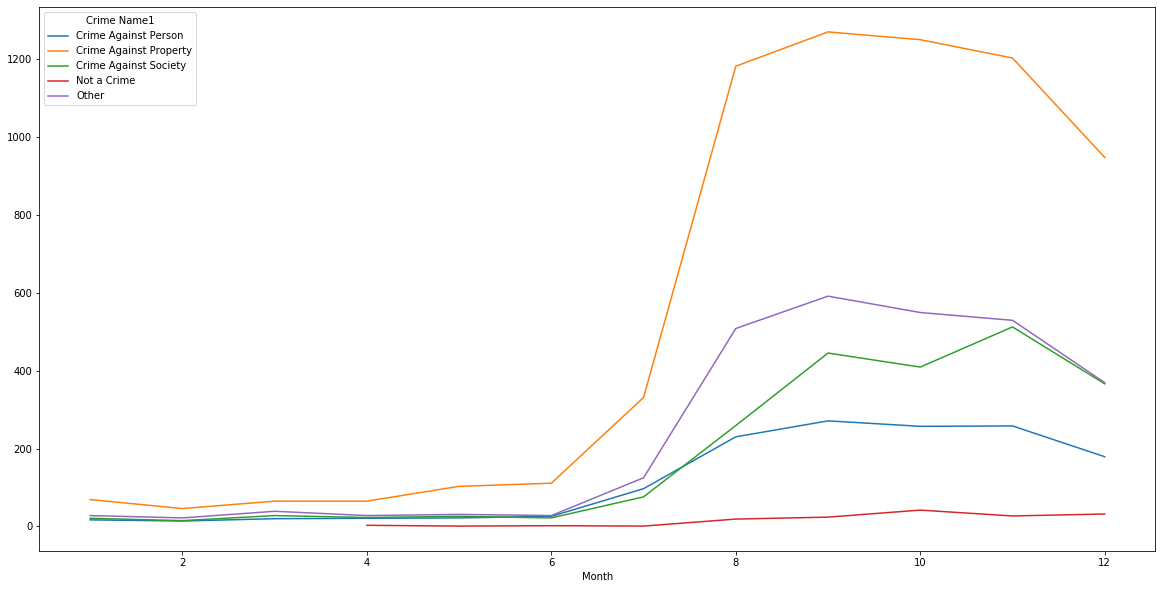

In [11]:
year = pd.DataFrame(crime.groupby(['Crime Name1', 'Month']).size())
year = year.reset_index()
year.columns = ['Crime Name1', 'Month', 'Number']

dis = year.pivot(index = 'Month', columns = 'Crime Name1', values = 'Number')
dis.plot(figsize=(20,10))

From this graph we can see that the number of crimes dramatically increases after July. This could have multiple reasons: Summer is vacation and travel season, which could contribute to the increase of crime by increasing the number of people flowing throught the area. The weather after July is also more stable and warmer for criminals to committ crimes (especially at night, when the crime happens the most). Although it is quite interesting that January through June there is a crime number so low as to be almost 1/15 of, say, August.

Let's also see which of these 5 cities have the most number of crimes. We do this by ploting a bar chart of the number of crimes in each city.

Text(0, 0.5, 'Total Number of Crimes')

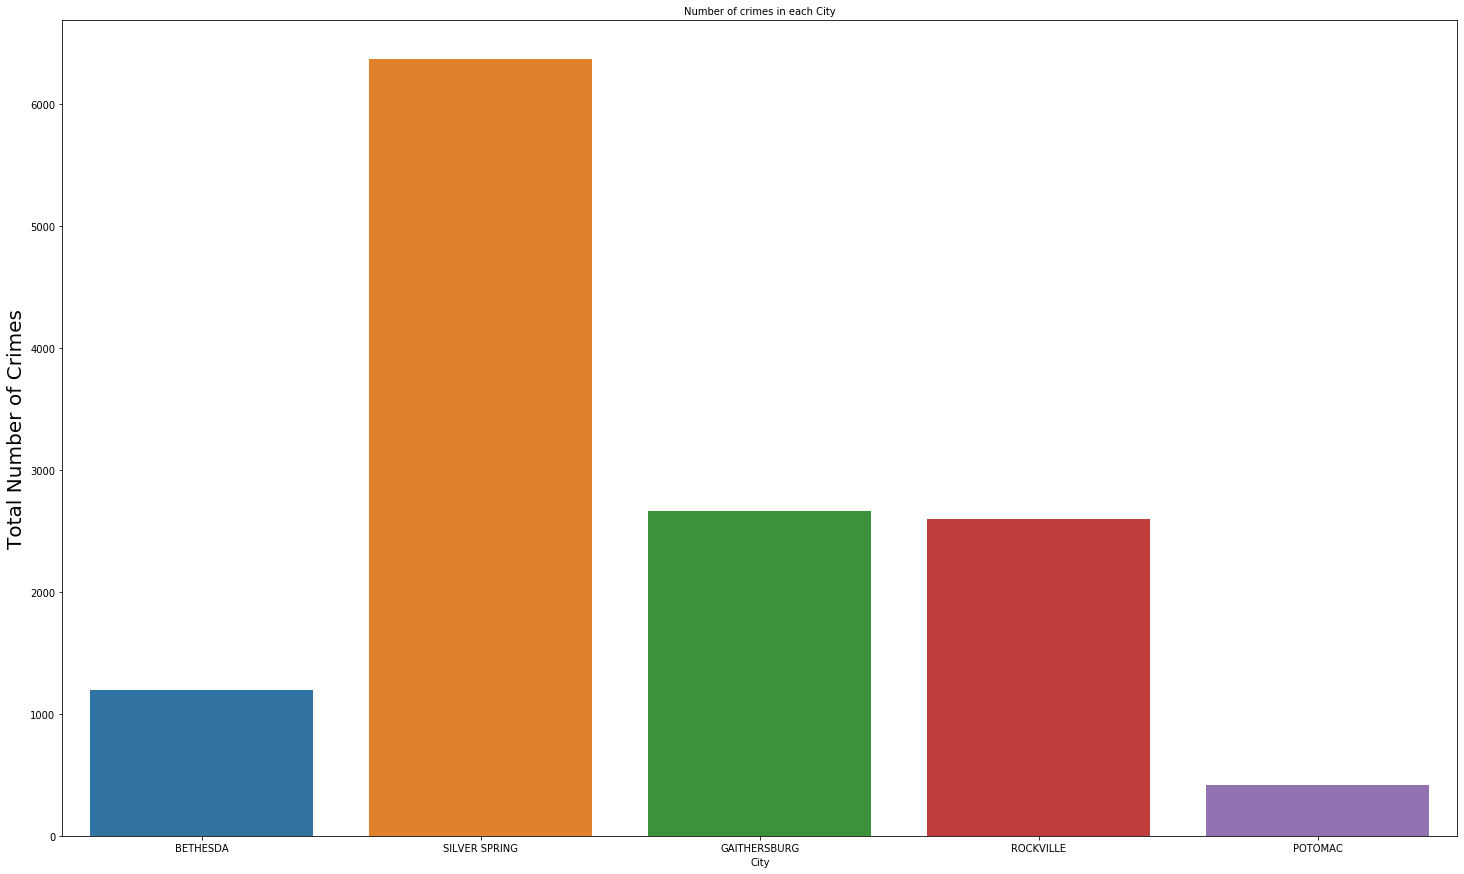

In [12]:
plt.figure(figsize=(25, 15))

PDN = sns.countplot(x = "City", data = crime).set_title('Number of crimes in each City', fontsize = 10)
plt.xlabel("City", fontsize = 10)
plt.ylabel("Total Number of Crimes", fontsize = 20)

As seen, we can easily tell that Silver Spring, out of all cities, have the most number of crimes. In fact, it have a crime number 2 times as the number of any city. Let's take a closer look at Silver Spring's crime data.

Text(0, 0.5, 'Number of Crimes')

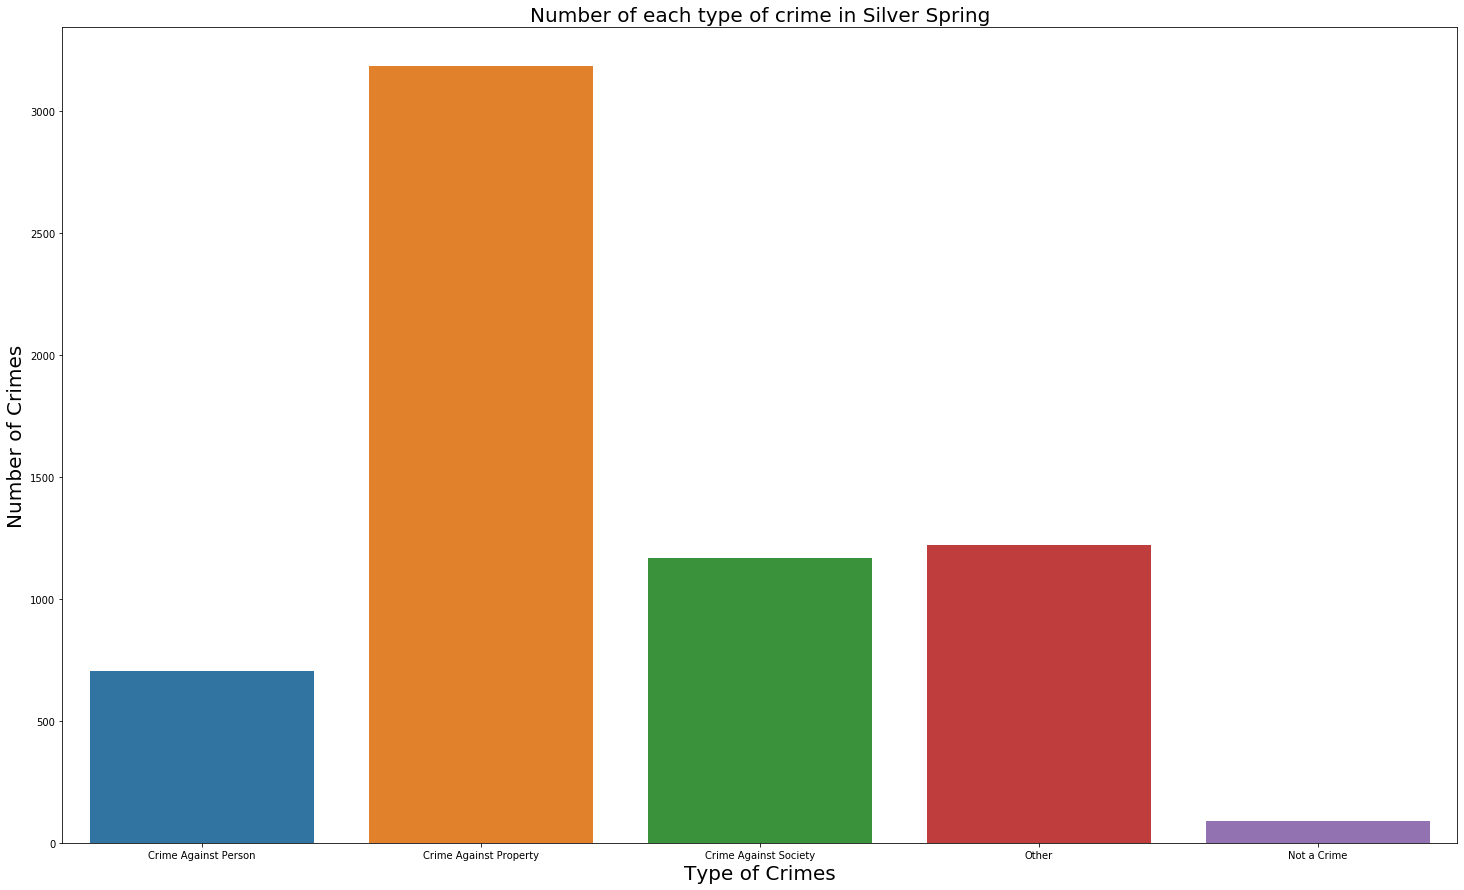

In [13]:
silverS_crime = crime[crime.City == 'SILVER SPRING']
silverS_crime.reset_index(drop = True)

plt.figure(figsize=(25, 15))
sns.countplot(x = "Crime Name1", data = silverS_crime).set_title("Number of each type of crime in Silver Spring", fontsize = 20)
plt.xlabel("Type of Crimes", fontsize = 20)
plt.ylabel("Number of Crimes", fontsize = 20)

It turns out that Crime against property is the most common type of crime in Silver Spring. Crime against property includes motor vehicle theft, shoplifting, robbery, and identity theft. Let's also plot the crime with the time of the day to better understand when these crimes happen. We first drop those that are categorized as "Not a Crime" because, well, they are not crimes.

In [14]:
temp = silverS_crime['Crime Name1'] != "Not a Crime"
silverS = silverS_crime[temp]
silverS.head()

,Incident ID,Offence Code,CR Number,Crime Name1,Crime Name2,City,Start_Date_Time,Latitude,Longitude,Police District Number,Year,Month
3,201233523,1114,190015440,Crime Against Person,Forcible Sodomy,SILVER SPRING,2019-04-02 11:00:00,39.020392,-77.012776,3D,2019.0,4.0
12,201255288,1216,190042407,Crime Against Property,Robbery,SILVER SPRING,2019-09-04 17:05:00,39.036133,-77.050154,4D,2019.0,9.0
18,201257007,2303,190044554,Crime Against Property,Shoplifting,SILVER SPRING,2019-09-17 15:30:00,39.083822,-77.077657,4D,2019.0,9.0
24,201257762,2404,190045517,Crime Against Property,Motor Vehicle Theft,SILVER SPRING,2019-09-22 20:00:00,38.988800,-77.008851,3D,2019.0,9.0
43,201228491,2303,190009179,Crime Against Property,Shoplifting,SILVER SPRING,2019-02-26 16:30:00,39.036444,-77.056112,4D,2019.0,2.0


Creating a seperate dataframe and count the number of crimes of each type and seperating them based on the time they happened. Plotting a line graph.

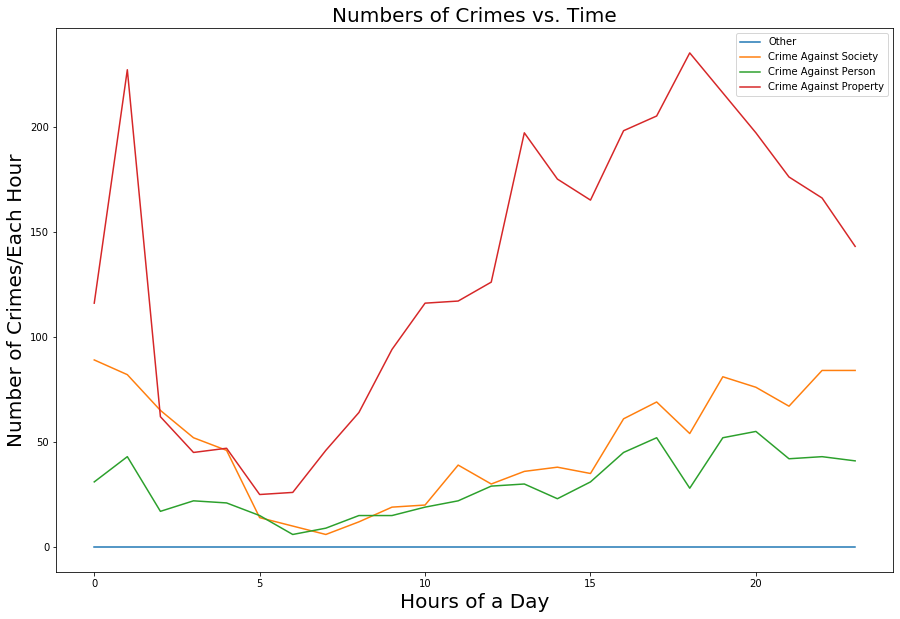

In [29]:
silverS = silverS.loc[(silverS['Crime Name1'] == 'Crime Against Person') | \
                     (silverS['Crime Name1'] == 'Crime Against Property') | \
                     (silverS['Crime Name1'] == 'Crime Against Society') | \
                     (silverS['Crime Name1'] == 'Other')]
silverS.reset_index(drop = True)
time = np.arange(24)
listofzeros = [0] * 24
new = pd.DataFrame({'Times':time, 'Crime Against Property':listofzeros, 'Crime Against Person':listofzeros, 'Crime Against Society':listofzeros, 'Other':listofzeros})

zero = datetime.strptime('23:59:59', '%H:%M:%S').time()
one = datetime.strptime('1:00:00', '%H:%M:%S').time()
two = datetime.strptime('2:00:00', '%H:%M:%S').time()
three = datetime.strptime('3:00:00', '%H:%M:%S').time()
four = datetime.strptime('4:00:00', '%H:%M:%S').time()
five = datetime.strptime('5:00:00', '%H:%M:%S').time()
six = datetime.strptime('6:00:00', '%H:%M:%S').time()
seven = datetime.strptime('7:00:00', '%H:%M:%S').time()
eight = datetime.strptime('8:00:00', '%H:%M:%S').time()
nine = datetime.strptime('9:00:00', '%H:%M:%S').time()
ten = datetime.strptime('10:00:00', '%H:%M:%S').time()
eleven = datetime.strptime('11:00:00', '%H:%M:%S').time()
twelve = datetime.strptime('12:00:00', '%H:%M:%S').time()
thirteen = datetime.strptime('13:00:00', '%H:%M:%S').time()
fourteen = datetime.strptime('14:00:00', '%H:%M:%S').time()
fifteen = datetime.strptime('15:00:00', '%H:%M:%S').time()
sixteen = datetime.strptime('16:00:00', '%H:%M:%S').time()
seventeen = datetime.strptime('17:00:00', '%H:%M:%S').time()
eighteen = datetime.strptime('18:00:00', '%H:%M:%S').time()
nineteen = datetime.strptime('19:00:00', '%H:%M:%S').time()
twenty = datetime.strptime('20:00:00', '%H:%M:%S').time()
twentyone = datetime.strptime('21:00:00', '%H:%M:%S').time()
twentytwo = datetime.strptime('22:00:00', '%H:%M:%S').time()
twentythree = datetime.strptime('23:00:00', '%H:%M:%S').time()

new.at[0, 'Crime Against Property'] = new.at[0, 'Crime Against Property'] + 1

for index, row in silverS.iterrows():
    if row['Start_Date_Time'].time() < one:
        if row['Crime Name1'] == 'Crime Against Property':
            new.at[1, 'Crime Against Property'] = new.at[1, 'Crime Against Property'] + 1
        elif row['Crime Name1'] == 'Crime Against Society':
            new.at[1, 'Crime Against Society'] = new.at[1, 'Crime Against Society'] + 1
        elif row['Crime Name1'] == 'Crime Against Person':
            new.at[1, 'Crime Against Person'] = new.at[1, 'Crime Against Person'] + 1
        else: new.at[1, 'Other'] = new.at[1, 'Other'] + 1
    elif row['Start_Date_Time'].time() < two:
        if row['Crime Name1'] == 'Crime Against Property':
            new.at[2, 'Crime Against Property'] = new.at[2, 'Crime Against Property'] + 1
        elif row['Crime Name1'] == 'Crime Against Society':
            new.at[2, 'Crime Against Society'] = new.at[2, 'Crime Against Society'] + 1
        elif row['Crime Name1'] == 'Crime Against Person':
            new.at[2, 'Crime Against Person'] = new.at[2, 'Crime Against Person'] + 1
        else: new.at[2, 'Other'] = new.at[2, 'Other'] + 1
    elif row['Start_Date_Time'].time() < three:
        if row['Crime Name1'] == 'Crime Against Property':
            new.at[3, 'Crime Against Property'] = new.at[3, 'Crime Against Property'] + 1
        elif row['Crime Name1'] == 'Crime Against Society':
            new.at[3, 'Crime Against Society'] = new.at[3, 'Crime Against Society'] + 1
        elif row['Crime Name1'] == 'Crime Against Person':
            new.at[3, 'Crime Against Person'] = new.at[3, 'Crime Against Person'] + 1
        else: new.at[3, 'Other'] = new.at[3, 'Other'] + 1
    elif row['Start_Date_Time'].time() < four:
        if row['Crime Name1'] == 'Crime Against Property':
            new.at[4, 'Crime Against Property'] = new.at[4, 'Crime Against Property'] + 1
        elif row['Crime Name1'] == 'Crime Against Society':
            new.at[4, 'Crime Against Society'] = new.at[4, 'Crime Against Society'] + 1
        elif row['Crime Name1'] == 'Crime Against Person':
            new.at[4, 'Crime Against Person'] = new.at[4, 'Crime Against Person'] + 1
        else: new.at[4, 'Other'] = new.at[4, 'Other'] + 1
    elif row['Start_Date_Time'].time() < five:
        if row['Crime Name1'] == 'Crime Against Property':
            new.at[5, 'Crime Against Property'] = new.at[5, 'Crime Against Property'] + 1
        elif row['Crime Name1'] == 'Crime Against Society':
            new.at[5, 'Crime Against Society'] = new.at[5, 'Crime Against Society'] + 1
        elif row['Crime Name1'] == 'Crime Against Person':
            new.at[5, 'Crime Against Person'] = new.at[5, 'Crime Against Person'] + 1
        else: new.at[5, 'Other'] = new.at[5, 'Other'] + 1
    elif row['Start_Date_Time'].time() < six:
        if row['Crime Name1'] == 'Crime Against Property':
            new.at[6, 'Crime Against Property'] = new.at[6, 'Crime Against Property'] + 1
        elif row['Crime Name1'] == 'Crime Against Society':
            new.at[6, 'Crime Against Society'] = new.at[6, 'Crime Against Society'] + 1
        elif row['Crime Name1'] == 'Crime Against Person':
            new.at[6, 'Crime Against Person'] = new.at[6, 'Crime Against Person'] + 1
        else: new.at[6, 'Other'] = new.at[6, 'Other'] + 1
    elif row['Start_Date_Time'].time() < seven:
        if row['Crime Name1'] == 'Crime Against Property':
            new.at[7, 'Crime Against Property'] = new.at[7, 'Crime Against Property'] + 1
        elif row['Crime Name1'] == 'Crime Against Society':
            new.at[7, 'Crime Against Society'] = new.at[7, 'Crime Against Society'] + 1
        elif row['Crime Name1'] == 'Crime Against Person':
            new.at[7, 'Crime Against Person'] = new.at[7, 'Crime Against Person'] + 1
        else: new.at[7, 'Other'] = new.at[7, 'Other'] + 1
    elif row['Start_Date_Time'].time() < eight:
        if row['Crime Name1'] == 'Crime Against Property':
            new.at[8, 'Crime Against Property'] = new.at[8, 'Crime Against Property'] + 1
        elif row['Crime Name1'] == 'Crime Against Society':
            new.at[8, 'Crime Against Society'] = new.at[8, 'Crime Against Society'] + 1
        elif row['Crime Name1'] == 'Crime Against Person':
            new.at[8, 'Crime Against Person'] = new.at[8, 'Crime Against Person'] + 1
        else: new.at[8, 'Other'] = new.at[8, 'Other'] + 1
    elif row['Start_Date_Time'].time() < nine:
        if row['Crime Name1'] == 'Crime Against Property':
            new.at[9, 'Crime Against Property'] = new.at[9, 'Crime Against Property'] + 1
        elif row['Crime Name1'] == 'Crime Against Society':
            new.at[9, 'Crime Against Society'] = new.at[9, 'Crime Against Society'] + 1
        elif row['Crime Name1'] == 'Crime Against Person':
            new.at[9, 'Crime Against Person'] = new.at[9, 'Crime Against Person'] + 1
        else: new.at[9, 'Other'] = new.at[9, 'Other'] + 1
    elif row['Start_Date_Time'].time() < ten:
        if row['Crime Name1'] == 'Crime Against Property':
            new.at[10, 'Crime Against Property'] = new.at[10, 'Crime Against Property'] + 1
        elif row['Crime Name1'] == 'Crime Against Society':
            new.at[10, 'Crime Against Society'] = new.at[10, 'Crime Against Society'] + 1
        elif row['Crime Name1'] == 'Crime Against Person':
            new.at[10, 'Crime Against Person'] = new.at[10, 'Crime Against Person'] + 1
        else: new.at[10, 'Other'] = new.at[10, 'Other'] + 1
    elif row['Start_Date_Time'].time() < eleven:
        if row['Crime Name1'] == 'Crime Against Property':
            new.at[11, 'Crime Against Property'] = new.at[11, 'Crime Against Property'] + 1
        elif row['Crime Name1'] == 'Crime Against Society':
            new.at[11, 'Crime Against Society'] = new.at[11, 'Crime Against Society'] + 1
        elif row['Crime Name1'] == 'Crime Against Person':
            new.at[11, 'Crime Against Person'] = new.at[11, 'Crime Against Person'] + 1
        else: new.at[11, 'Other'] = new.at[11, 'Other'] + 1
    elif row['Start_Date_Time'].time() < twelve:
        if row['Crime Name1'] == 'Crime Against Property':
            new.at[12, 'Crime Against Property'] = new.at[12, 'Crime Against Property'] + 1
        elif row['Crime Name1'] == 'Crime Against Society':
            new.at[12, 'Crime Against Society'] = new.at[12, 'Crime Against Society'] + 1
        elif row['Crime Name1'] == 'Crime Against Person':
            new.at[12, 'Crime Against Person'] = new.at[12, 'Crime Against Person'] + 1
        else: new.at[12, 'Other'] = new.at[12, 'Other'] + 1
    elif row['Start_Date_Time'].time() < thirteen:
        if row['Crime Name1'] == 'Crime Against Property':
            new.at[13, 'Crime Against Property'] = new.at[13, 'Crime Against Property'] + 1
        elif row['Crime Name1'] == 'Crime Against Society':
            new.at[13, 'Crime Against Society'] = new.at[13, 'Crime Against Society'] + 1
        elif row['Crime Name1'] == 'Crime Against Person':
            new.at[13, 'Crime Against Person'] = new.at[13, 'Crime Against Person'] + 1
        else: new.at[13, 'Other'] = new.at[13, 'Other'] + 1
    elif row['Start_Date_Time'].time() < fourteen:
        if row['Crime Name1'] == 'Crime Against Property':
            new.at[14, 'Crime Against Property'] = new.at[14, 'Crime Against Property'] + 1
        elif row['Crime Name1'] == 'Crime Against Society':
            new.at[14, 'Crime Against Society'] = new.at[14, 'Crime Against Society'] + 1
        elif row['Crime Name1'] == 'Crime Against Person':
            new.at[14, 'Crime Against Person'] = new.at[14, 'Crime Against Person'] + 1
        else: new.at[14, 'Other'] = new.at[14, 'Other'] + 1
    elif row['Start_Date_Time'].time() < fifteen:
        if row['Crime Name1'] == 'Crime Against Property':
            new.at[15, 'Crime Against Property'] = new.at[15, 'Crime Against Property'] + 1
        elif row['Crime Name1'] == 'Crime Against Society':
            new.at[15, 'Crime Against Society'] = new.at[15, 'Crime Against Society'] + 1
        elif row['Crime Name1'] == 'Crime Against Person':
            new.at[15, 'Crime Against Person'] = new.at[15, 'Crime Against Person'] + 1
        else: new.at[15, 'Other'] = new.at[15, 'Other'] + 1
    elif row['Start_Date_Time'].time() < sixteen:
        if row['Crime Name1'] == 'Crime Against Property':
            new.at[16, 'Crime Against Property'] = new.at[16, 'Crime Against Property'] + 1
        elif row['Crime Name1'] == 'Crime Against Society':
            new.at[16, 'Crime Against Society'] = new.at[16, 'Crime Against Society'] + 1
        elif row['Crime Name1'] == 'Crime Against Person':
            new.at[16, 'Crime Against Person'] = new.at[16, 'Crime Against Person'] + 1
        else: new.at[16, 'Other'] = new.at[16, 'Other'] + 1
    elif row['Start_Date_Time'].time() < seventeen:
        if row['Crime Name1'] == 'Crime Against Property':
            new.at[17, 'Crime Against Property'] = new.at[17, 'Crime Against Property'] + 1
        elif row['Crime Name1'] == 'Crime Against Society':
            new.at[17, 'Crime Against Society'] = new.at[17, 'Crime Against Society'] + 1
        elif row['Crime Name1'] == 'Crime Against Person':
            new.at[17, 'Crime Against Person'] = new.at[17, 'Crime Against Person'] + 1
        else: new.at[17, 'Other'] = new.at[17, 'Other'] + 1
    elif row['Start_Date_Time'].time() < eighteen:
        if row['Crime Name1'] == 'Crime Against Property':
            new.at[18, 'Crime Against Property'] = new.at[18, 'Crime Against Property'] + 1
        elif row['Crime Name1'] == 'Crime Against Society':
            new.at[18, 'Crime Against Society'] = new.at[18, 'Crime Against Society'] + 1
        elif row['Crime Name1'] == 'Crime Against Person':
            new.at[18, 'Crime Against Person'] = new.at[18, 'Crime Against Person'] + 1
        else: new.at[18, 'Other'] = new.at[18, 'Other'] + 1
    elif row['Start_Date_Time'].time() < nineteen:
        if row['Crime Name1'] == 'Crime Against Property':
            new.at[19, 'Crime Against Property'] = new.at[19, 'Crime Against Property'] + 1
        elif row['Crime Name1'] == 'Crime Against Society':
            new.at[19, 'Crime Against Society'] = new.at[19, 'Crime Against Society'] + 1
        elif row['Crime Name1'] == 'Crime Against Person':
            new.at[19, 'Crime Against Person'] = new.at[19, 'Crime Against Person'] + 1
        else: new.at[19, 'Other'] = new.at[19, 'Other'] + 1
    elif row['Start_Date_Time'].time() < twenty:
        if row['Crime Name1'] == 'Crime Against Property':
            new.at[20, 'Crime Against Property'] = new.at[20, 'Crime Against Property'] + 1
        elif row['Crime Name1'] == 'Crime Against Society':
            new.at[20, 'Crime Against Society'] = new.at[20, 'Crime Against Society'] + 1
        elif row['Crime Name1'] == 'Crime Against Person':
            new.at[20, 'Crime Against Person'] = new.at[20, 'Crime Against Person'] + 1
        else: new.at[20, 'Other'] = new.at[20, 'Other'] + 1
    elif row['Start_Date_Time'].time() < twentyone:
        if row['Crime Name1'] == 'Crime Against Property':
            new.at[21, 'Crime Against Property'] = new.at[21, 'Crime Against Property'] + 1
        elif row['Crime Name1'] == 'Crime Against Society':
            new.at[21, 'Crime Against Society'] = new.at[21, 'Crime Against Society'] + 1
        elif row['Crime Name1'] == 'Crime Against Person':
            new.at[21, 'Crime Against Person'] = new.at[21, 'Crime Against Person'] + 1
        else: new.at[21, 'Other'] = new.at[21, 'Other'] + 1
    elif row['Start_Date_Time'].time() < twentytwo:
        if row['Crime Name1'] == 'Crime Against Property':
            new.at[22, 'Crime Against Property'] = new.at[22, 'Crime Against Property'] + 1
        elif row['Crime Name1'] == 'Crime Against Society':
            new.at[22, 'Crime Against Society'] = new.at[22, 'Crime Against Society'] + 1
        elif row['Crime Name1'] == 'Crime Against Person':
            new.at[22, 'Crime Against Person'] = new.at[22, 'Crime Against Person'] + 1
        else: new.at[22, 'Other'] = new.at[22, 'Other'] + 1
    elif row['Start_Date_Time'].time() < twentythree:
        if row['Crime Name1'] == 'Crime Against Property':
            new.at[23, 'Crime Against Property'] = new.at[23, 'Crime Against Property'] + 1
        elif row['Crime Name1'] == 'Crime Against Society':
            new.at[23, 'Crime Against Society'] = new.at[23, 'Crime Against Society'] + 1
        elif row['Crime Name1'] == 'Crime Against Person':
            new.at[23, 'Crime Against Person'] = new.at[23, 'Crime Against Person'] + 1
        else: new.at[23, 'Other'] = new.at[23, 'Other'] + 1
    elif row['Start_Date_Time'].time() < zero:
        if row['Crime Name1'] == 'Crime Against Property':
            new.at[0, 'Crime Against Property'] = new.at[0, 'Crime Against Property'] + 1
        elif row['Crime Name1'] == 'Crime Against Society':
            new.at[0, 'Crime Against Society'] = new.at[0, 'Crime Against Society'] + 1
        elif row['Crime Name1'] == 'Crime Against Person':
            new.at[0, 'Crime Against Person'] = new.at[0, 'Crime Against Person'] + 1
        else: new.at[0, 'Other'] = new.at[0, 'Other'] + 1

plt.figure(figsize=(15, 10))            
plt.plot('Times', 'Other', data = new)
plt.plot('Times', 'Crime Against Society', data = new)
plt.plot('Times', 'Crime Against Person', data = new)
plt.plot('Times', 'Crime Against Property', data = new)
plt.title("Numbers of Crimes vs. Time", fontsize = 20)
plt.xlabel("Hours of a Day", fontsize = 20)
plt.ylabel("Number of Crimes/Each Hour", fontsize = 20)
plt.legend()

We can see that the time between around 2 to 10 is the least likely time for a crime to happen. And 1 and 19 are the most likely time for a crime to happen. Let's look closer at these types of crime and see what exactly are they. Using a pie chart for it.

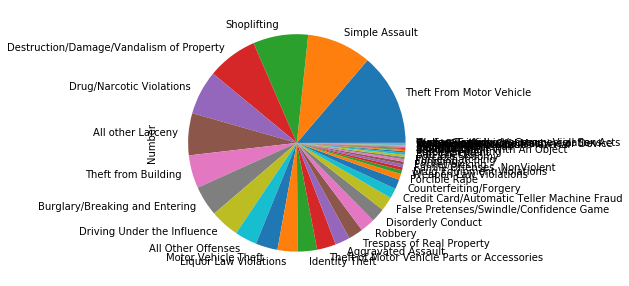

In [30]:
crimedata = pd.DataFrame(silverS['Crime Name2'].value_counts().astype(float))
crimedata = crimedata.reset_index()
crimedata.columns = ['Crime Name2', 'Number']
crimedata = crimedata.set_index('Crime Name2')

plot = crimedata.plot.pie(y='Number', figsize=(5, 5))
plot.get_legend().remove()

This shows that Theft From Motor Vehicle is the most common type of crime in Silver Spring. Followed by Simple Assault and Shoplifting. This tells us not to park you car at Silver Spring in the afternoon.

## Predicting crime

Since theft from motor vehicle is the most common type of crime, let's see if we can successfully predict if a crime is a theft from motor vehicle. I would use 'theft' for theft from motor vehicle for short. It does not include other types of theft like shoplifting, etc. There are no linear relationship between the prediction variable and the response variable, therefore we cannot use any linear model. So we choose to use Random Forest Model.

In [32]:
is_theft = []
for index, row in silverS.iterrows():
    if row['Crime Name2'] == 'Theft From Motor Vehicle':
        is_theft.append(1)
    else:
        is_theft.append(0)

silverS['is_theft'] = is_theft

start_time = []
for index, row in silverS.iterrows():
    time = row['Start_Date_Time'].time()
    seconds = time.hour * 3600 + time.minute * 60 + time.second
    start_time.append(seconds)
    
silverS['start_time'] = start_time

x = silverS[['start_time', 'Latitude', 'Longitude']]
y = silverS[['is_theft']]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7)

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(x_train, y_train)

print('The accuracy of our model is:' + str(clf.score(x_test, y_test)))

The accuracy of our model is:0.83399209486166


Although we have our accuracy score, we still want to see how reliable it is. Let's test it by trying to predict every crime as not theft to compare.

In [33]:
percent_theft = y_test[y_test['is_theft'] == 1].shape[0] / x_test.shape[0]
1 - percent_theft

0.8478260869565217

What if we fail to predict a theft?

In [34]:
y_pred = clf.predict(x_test)
y_test.reindex()
loss = 0
i = 0
for index, row in y_test.iterrows():
    if row['is_theft'] == 1 and y_pred[i] == 0:
        loss = loss + 100
    elif row['is_theft'] == 0 and y_pred[i] == 1:
        loss = loss + 1
    i = i + 1
print("Loss of Random Forest Model: " + str(loss))
print("Loss of predicting all incident as non-theft: " + str(y_test[y_test['is_theft'] == 1].shape[0] * 100))

Loss of Random Forest Model: 13731
Loss of predicting all incident as non-theft: 15400


## Conclusion

In this project, we collected and tidied the data of crime happened in Bethesda and nearby cities. We found that Silver Spring has the highest number of crimes and the most common type is Crime against property. The crime usually happeneds during 10 AM to 12 AM. Don't park you car in Silver Spring during that time since the most common type of Crime against property in Silver Spring is theft from motor vehicle. Lastly we tried to predict if a crime in Silver Spring is a theft from vehicle and had an ok model.